# Assignment


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('BostonHousing.csv')

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# About the dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

# Question 
As always, we start off with EDA.

- Give me some insights, the better they are, the better your grade looks !!
- Then we move on to the modelling part

Using all of these variables, try to fit/train a linear regression model that predicts the price of the house. 

The ```MEDV``` is the price columns, it is in 1000's of $.

At the end, these are the things i am looking for:-
- Your model train and test RSME
- A python function that takes these values(training row for eg.) as input and predicts a price. 


That's all 

![](https://media.tenor.com/HyDkalWyz7YAAAAd/all-the-best-best-of-luck.gif)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
df.shape

(506, 14)

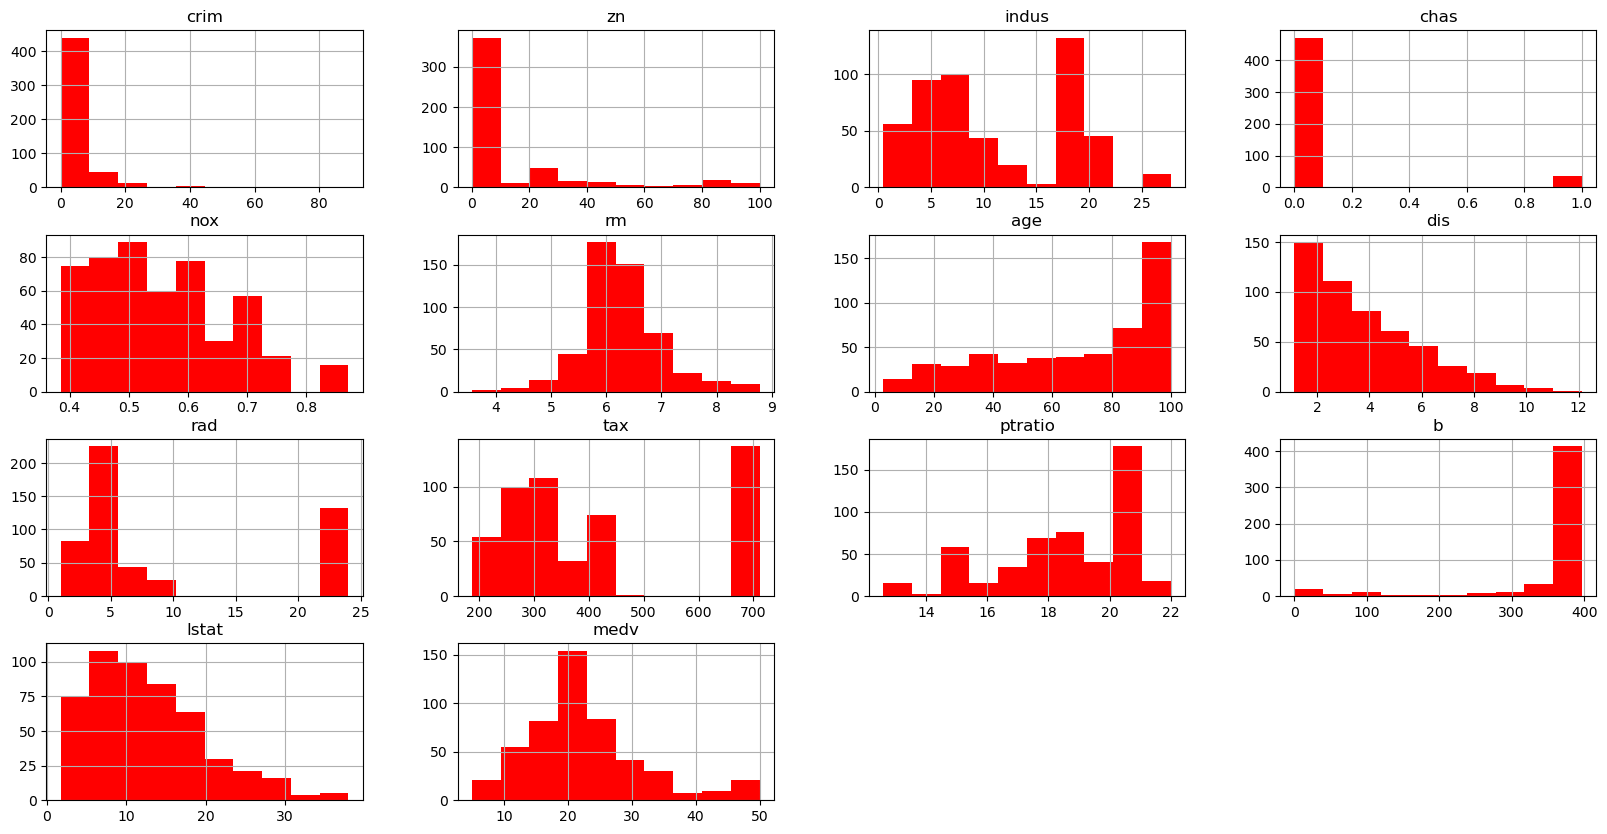

In [13]:
df.hist(figsize=(20,10),color = 'red')
plt.show()

In [20]:
# each column is converted into a histogram - tried converting color into red

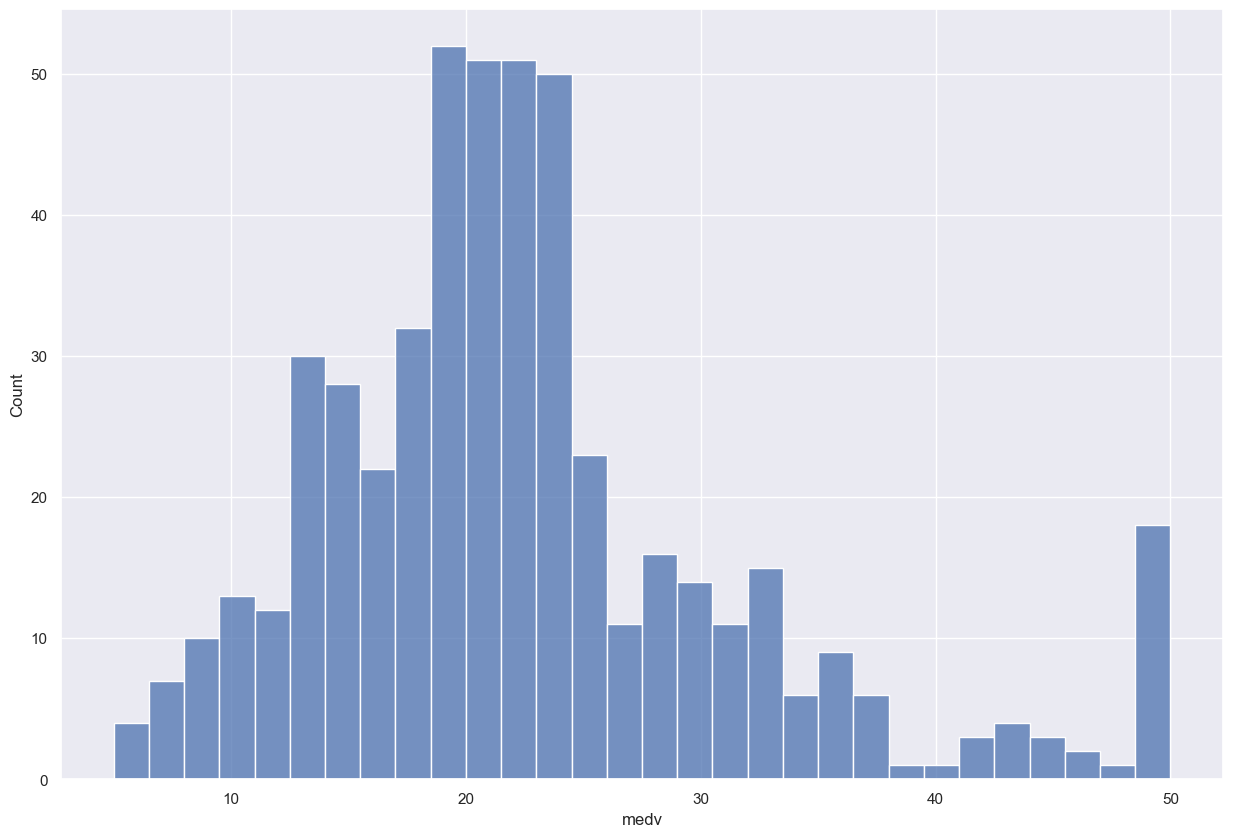

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(df['medv'], bins=30)
plt.show()

In [ ]:
# median value is counted and hence displayed

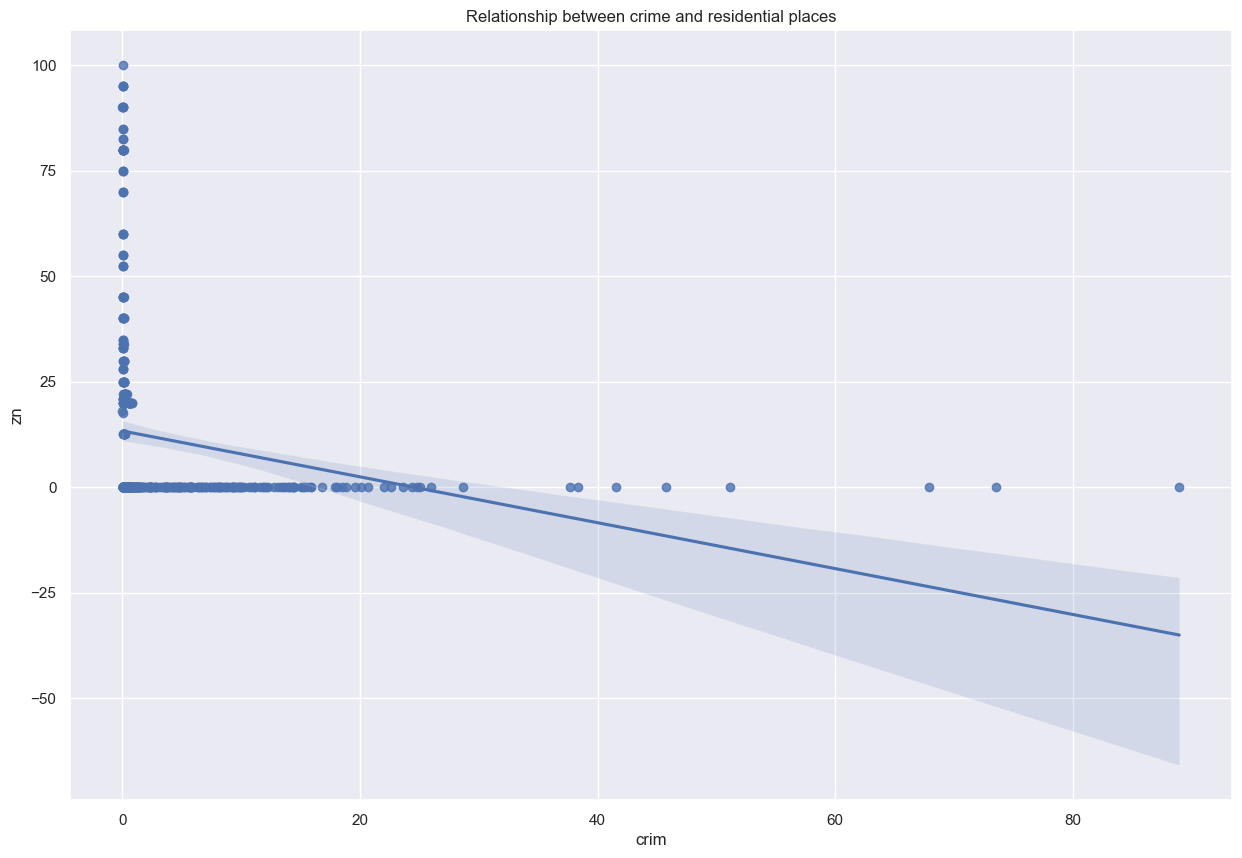

In [19]:
sns.regplot(x="crim",y="zn", data=df, fit_reg=True)
plt.title("Relationship between crime and residential places")
plt.show()

In [22]:
# tried something new but couldnt come to conclusion

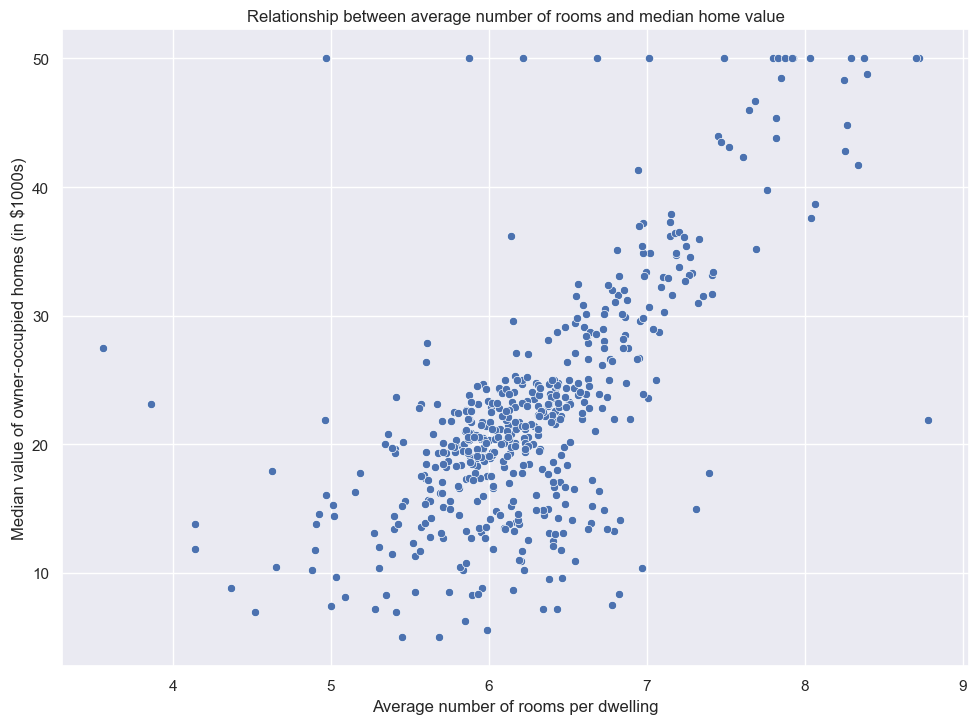

In [16]:
sns.scatterplot(x='rm', y='medv', data=df)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes (in $1000s)')
plt.title('Relationship between average number of rooms and median home value')
plt.show()

In [ ]:
# positive correlation between average number of rooms and median value of owner-occupied homes... a bit complicated data

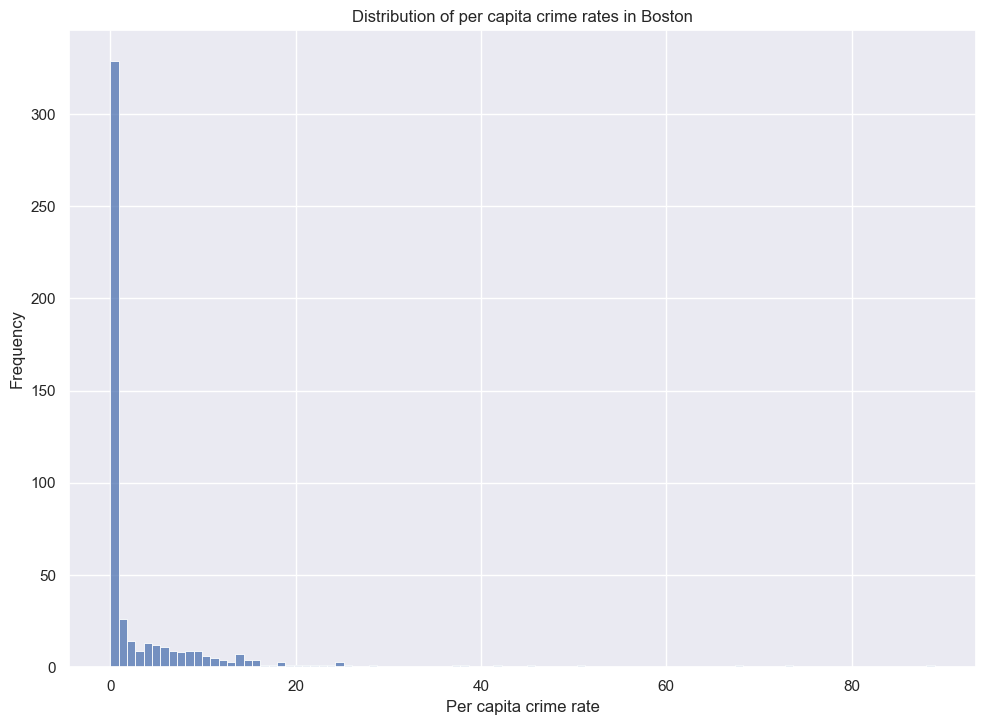

In [17]:
sns.histplot(df['crim'], kde=False)
plt.xlabel('Per capita crime rate')
plt.ylabel('Frequency')
plt.title('Distribution of per capita crime rates in Boston')
plt.show()

In [ ]:
# how to emphasize on one bin ? a doubt.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


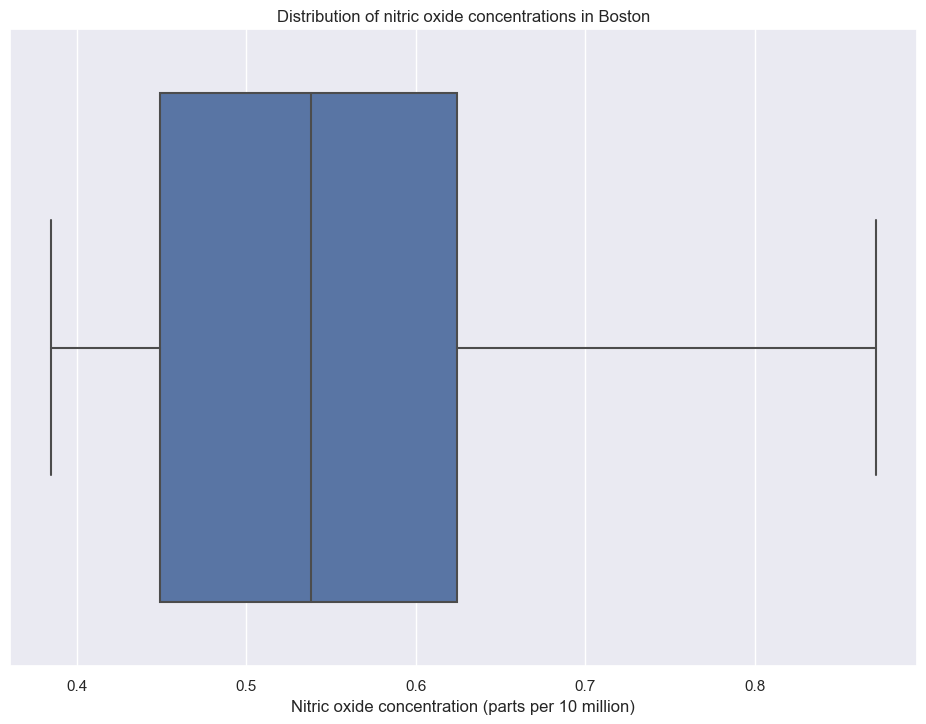

In [18]:
sns.boxplot(df['nox'])
plt.xlabel('Nitric oxide concentration (parts per 10 million)')
plt.title('Distribution of nitric oxide concentrations in Boston')
plt.show()

In [20]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [21]:
X = df.drop('medv', axis= 1)
y = df['medv']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
y_train_pred = lr.predict(X_train)

In [27]:
y_pred = lr.predict(X_test)

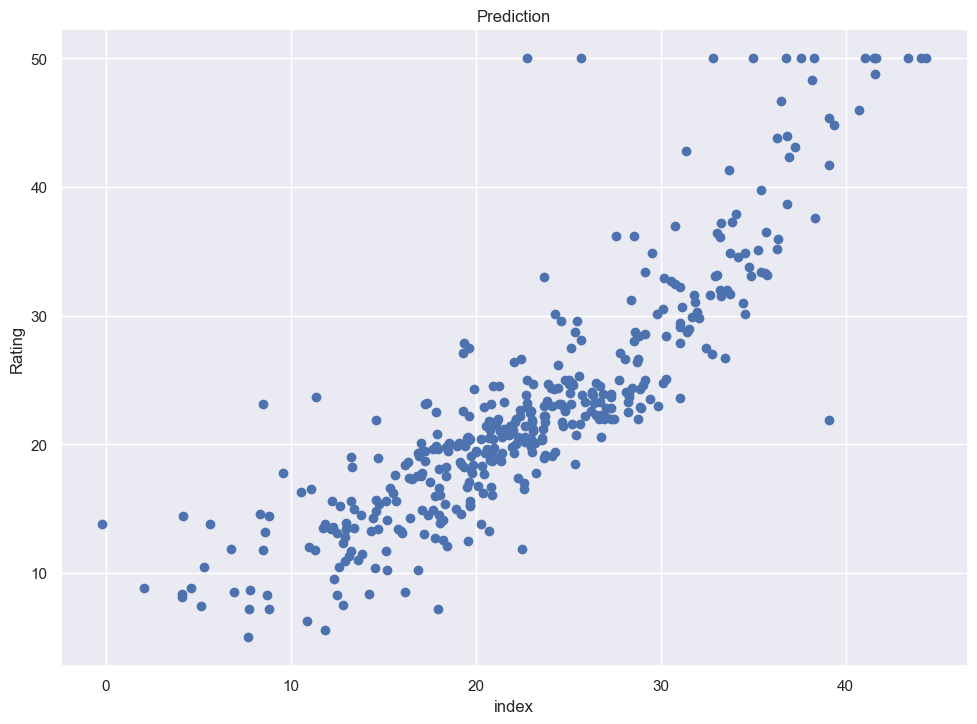

In [28]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.scatter(y_train_pred,y_train)


# Function add a legend  

In [29]:
X_range = [i for i in range(len(y_test))]

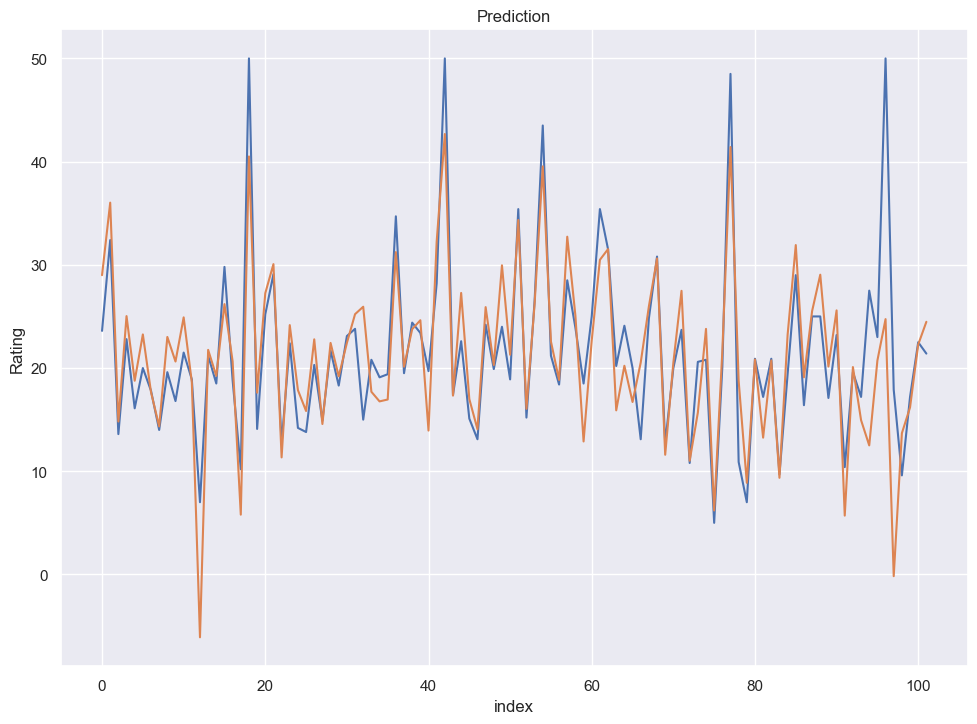

In [30]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.plot(X_range,y_test)
plt.plot(X_range,y_pred)

# Function add a legend  

In [31]:
mean_squared_error(y_test,y_pred)

24.29111947497371

In [32]:
mse = mean_squared_error(y_test,y_pred)

In [33]:
r2_score(y_test,y_pred)

0.6687594935356294

In [34]:
rsq = r2_score(y_test,y_pred)

In [35]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 24.29111947497371
r square : 0.6687594935356294


In [36]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 30.24675099392408
Coefficient of the line: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


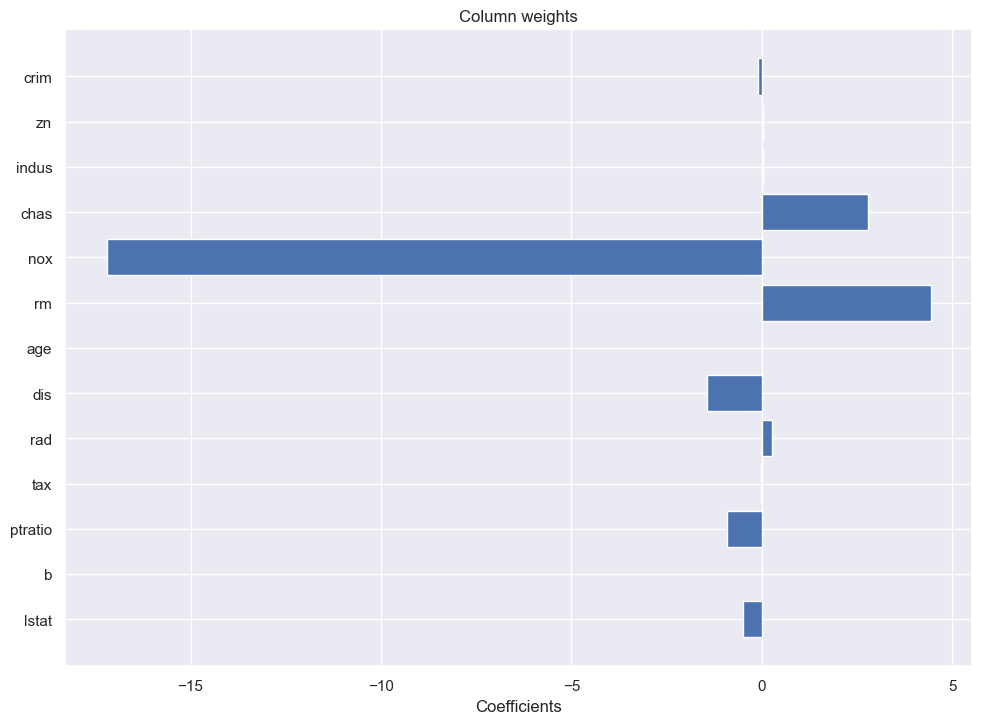

In [37]:
fig, ax = plt.subplots()

ax.barh(list(X_train.columns), list(lr.coef_), align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficients')
ax.set_title('Column weights')

plt.show()

In [38]:
def predict(a,b,c,d,e,f,g,h,i,j,k,l,m):
    temp=[]
    temp.append(lr.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m]]))
    return temp

In [39]:
predict(0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[array([29.95339638])]